In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [2]:
bank=pd.read_excel("../../Datasets/class_exercise/bank.xlsx", sheet_name="bank") # local
# bank=pd.read_excel("/content/drive/MyDrive/Dataset/bank.xlsx", sheet_name="bank") # gdrive colab

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
bank.select_dtypes("object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
bank["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [6]:
bank["job"].nunique()

12

In [7]:
bank["job"]=bank["job"].replace(["unemployed", "student", "retired"], "Not_earning")
bank["job"]=bank["job"].replace(["housemaid", "services", "admin."], "pink_collar")
bank["job"]=bank["job"].replace(["self-employed", "entrepreneur"], "Self_earning")

In [8]:
bank["job"].value_counts()

job
management      2566
pink_collar     2531
blue-collar     1944
technician      1823
Not_earning     1495
Self_earning     733
unknown           70
Name: count, dtype: int64

In [9]:
# help(bank["job"].replace)

In [10]:
bank["marital"].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [11]:
bank["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [12]:
bank["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [13]:
bank["housing"].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [14]:
bank["contact"].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [15]:
d=pd.crosstab(bank["contact"], bank["deposit"])
d

deposit,no,yes
contact,,
cellular,3673,4369
telephone,384,390
unknown,1816,530


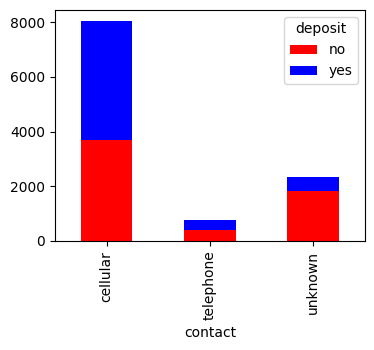

In [16]:
d=pd.crosstab(bank["contact"], bank["deposit"])
d.plot(kind="bar", stacked=True, figsize=(4,3), color=["red", "blue"])
plt.show()

In [17]:
bank["month"].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

In [18]:
pd.crosstab(bank["month"], bank["deposit"], margins="index")

deposit,no,yes,All
month,,,
apr,346,577,923
aug,831,688,1519
dec,10,100,110
feb,335,441,776
jan,202,142,344
jul,887,627,1514
jun,676,546,1222
mar,28,248,276
may,1899,925,2824


In [19]:
bank.drop(columns=["month"], inplace=True)

In [20]:
bank["poutcome"].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [21]:
pd.crosstab(bank["poutcome"], bank["deposit"], margins="index")

deposit,no,yes,All
poutcome,,,
failure,610,618,1228
other,230,307,537
success,93,978,1071
unknown,4940,3386,8326
All,5873,5289,11162


In [22]:
bank["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [23]:
bank["deposit"]=bank["deposit"].map({"yes":1, "no":0})
bank["deposit"].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [24]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [25]:
bank.select_dtypes("int").columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [26]:
bank.select_dtypes("int").describe(percentiles=[0.01,.02,.03,.04,.05,.1,.5,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,50%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,28.0,39.0,58.0,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,0.0,550.0,3897.6,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
day,11162.0,15.658036,8.420740,1.0,1.0,2.0,2.0,2.00,3.00,4.0,15.0,28.0,30.00,30.00,30.00,30.00,31.00,31.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,77.0,255.0,838.0,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,2.0,5.0,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,191.0,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,3.0,5.00,5.00,6.00,7.00,10.00,58.0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,1.00,1.00,1.00,1.00,1.00,1.0


In [27]:
type(bank)

pandas.core.frame.DataFrame

In [28]:
# Outlier capping
def Outliers(x):
  x=x.clip(upper=x.quantile(.99))
  x=x.clip(lower=x.quantile(.01))
  return x

In [29]:
num=bank.select_dtypes("int").apply(Outliers)  # outlier treatment done

In [30]:
# num
ob=bank.select_dtypes("object")

In [31]:
bank_data=pd.concat([num, ob], axis=1)
bank_data.shape

(11162, 16)

In [32]:
bank_data.select_dtypes("int").describe(percentiles=[0.01,.02,.03,.04,.05,.1,.5,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,50%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.198172,11.734976,22.0,22.0,24.0,25.0,25.0,26.0,28.0,39.0,58.0,61.0,64.0,68.0,72.0,77.0,77.0
day,11162.0,15.658036,8.420740,1.0,1.0,2.0,2.0,2.0,3.0,4.0,15.0,28.0,30.0,30.0,30.0,30.0,31.0,31.0
campaign,11162.0,2.433883,2.176754,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,7.0,8.0,8.0,10.0,13.0,13.0
previous,11162.0,0.776384,1.797315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,6.0,7.0,10.0,10.0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
ob.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [34]:
final_data=pd.get_dummies(bank_data,
                          columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome'],
                          drop_first=True)

In [35]:
final_data.shape

(11162, 27)

In [36]:
# Model

In [37]:
y=final_data["deposit"]
x=final_data.drop(columns=["deposit"])

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [39]:
dt0=DecisionTreeClassifier()
dt0.fit(x_train, y_train)

print("train Accuracy", dt0.score(x_train, y_train))
print("test Accuracy", dt0.score(x_test, y_test))


train Accuracy 1.0
test Accuracy 0.751269035532995


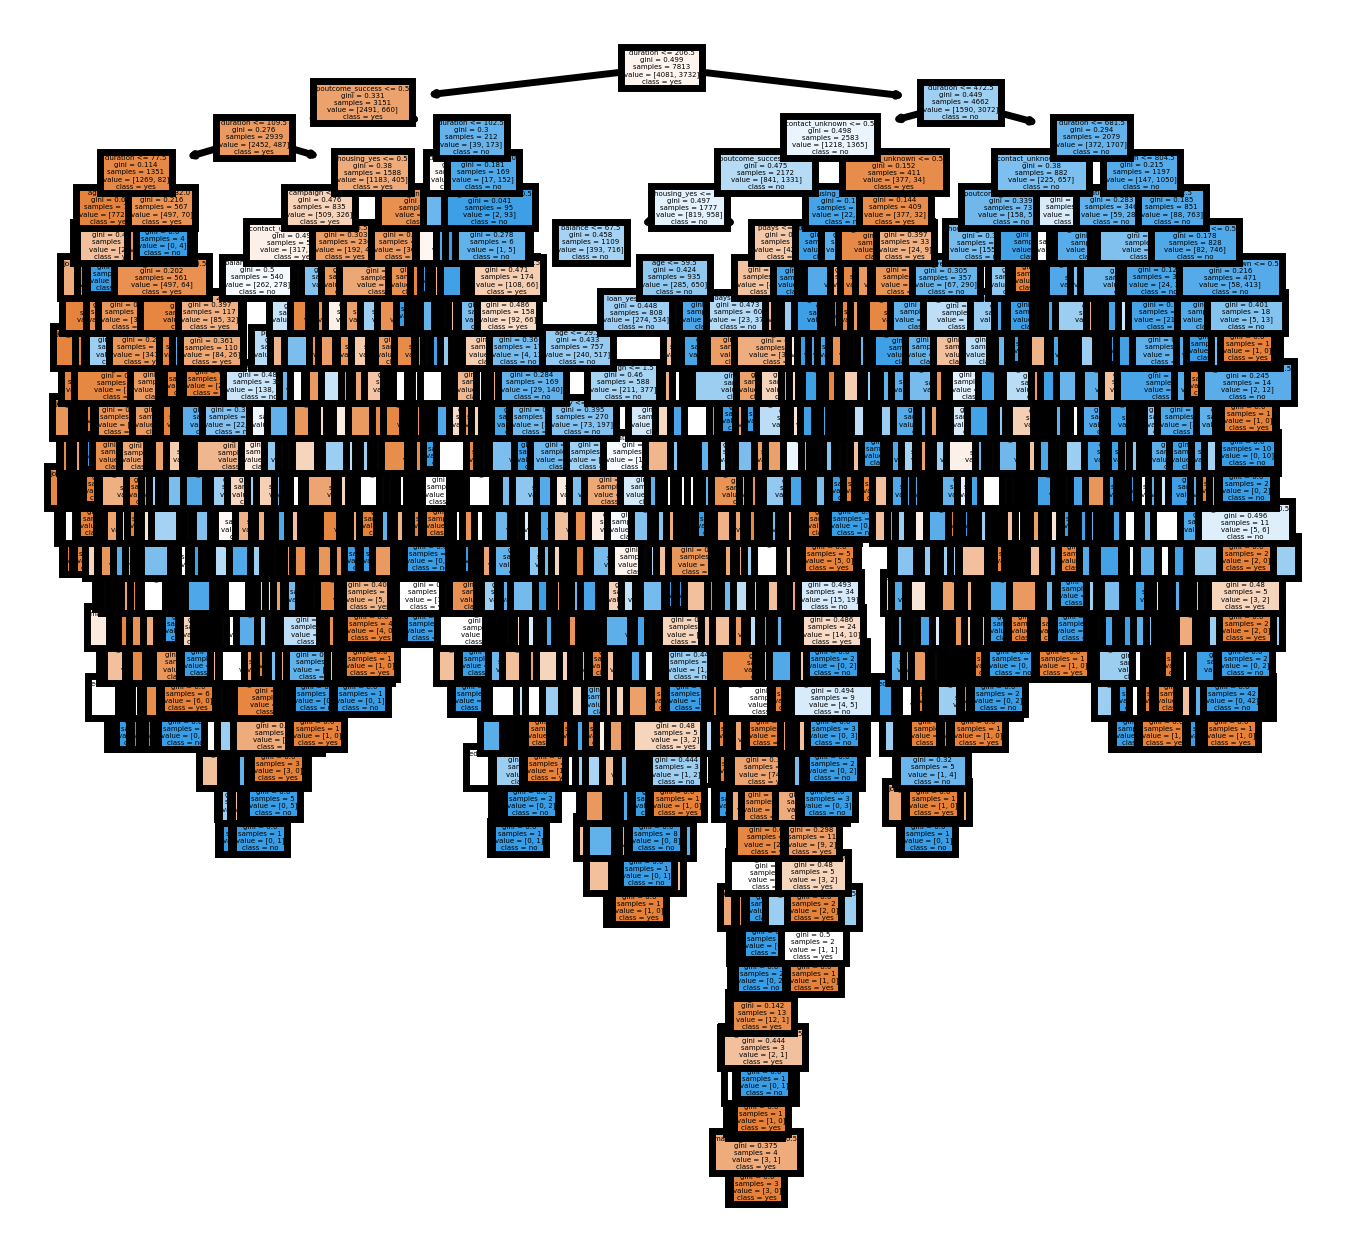

In [40]:
fn=x_train.columns

cn=["yes","no"]
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt0,feature_names = fn,class_names=cn,filled = True);

In [41]:
dt1=DecisionTreeClassifier( criterion="entropy", max_depth=9, min_samples_split=300, min_samples_leaf=20)
dt1.fit(x_train, y_train)

print("train Accuracy", dt1.score(x_train, y_train))
print("test Accuracy", dt1.score(x_test, y_test))

train Accuracy 0.8183796237040829
test Accuracy 0.8038220364287847


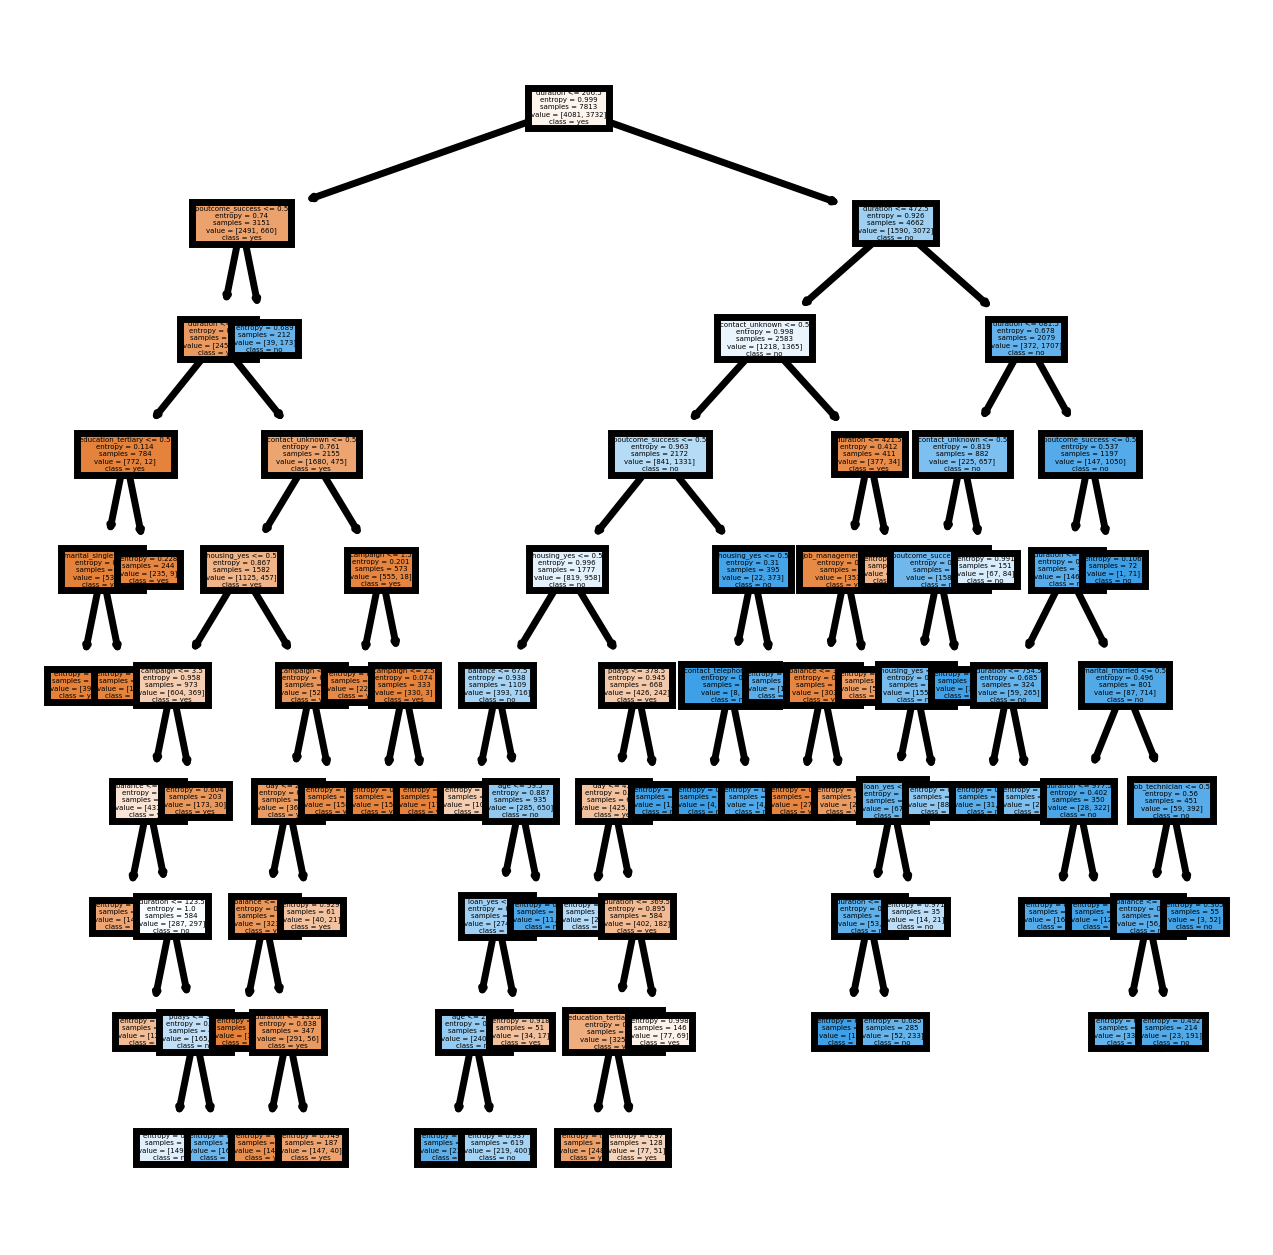

In [42]:
fn=x_train.columns

cn=["yes","no"]
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt1,feature_names = fn,class_names=cn,filled = True);

In [43]:
# help(dt1)

In [44]:
2*9*5*6*10

5400

In [45]:
# GridSearchCV()

In [46]:
params={"criterion":["gini", "entropy"],
             "max_depth":[5,7,9,10, 11, 15, 17,19, 20],
             "min_samples_split":[10,50,100,150, 200],
             "min_samples_leaf":[2,5,10,50, 70, 100, 150]}

dt2=DecisionTreeClassifier(random_state=0)

gserach_dt=GridSearchCV(estimator=dt2,
                        param_grid=params,
                        cv=10, n_jobs=-1,
                        # refit=True,
                        # scoring=["recall"]
                        )
gserach_dt.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11, 15, 17, 19, 20],
                         'min_samples_leaf': [2, 5, 10, 50, 70, 100, 150],
                         'min_samples_split': [10, 50, 100, 150, 200]})

In [47]:
gserach_dt.best_params_  # Best parameters

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 200}

In [48]:
gserach_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=200, random_state=0)

In [49]:
gserach_dt.best_score_

0.81095634490505

In [50]:
# 0.806092261544154
# {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 150}

In [51]:
pd.DataFrame(gserach_dt.cv_results_).to_csv("dt_cross_v.csv") # save the result

In [52]:
dt3=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=200, random_state=0)

In [53]:
dt3.fit(x_train, y_train)
print("train Accuracy", dt3.score(x_train, y_train))
print("test Accuracy", dt3.score(x_test, y_test))

train Accuracy 0.8246512223217715
test Accuracy 0.8106897581367573


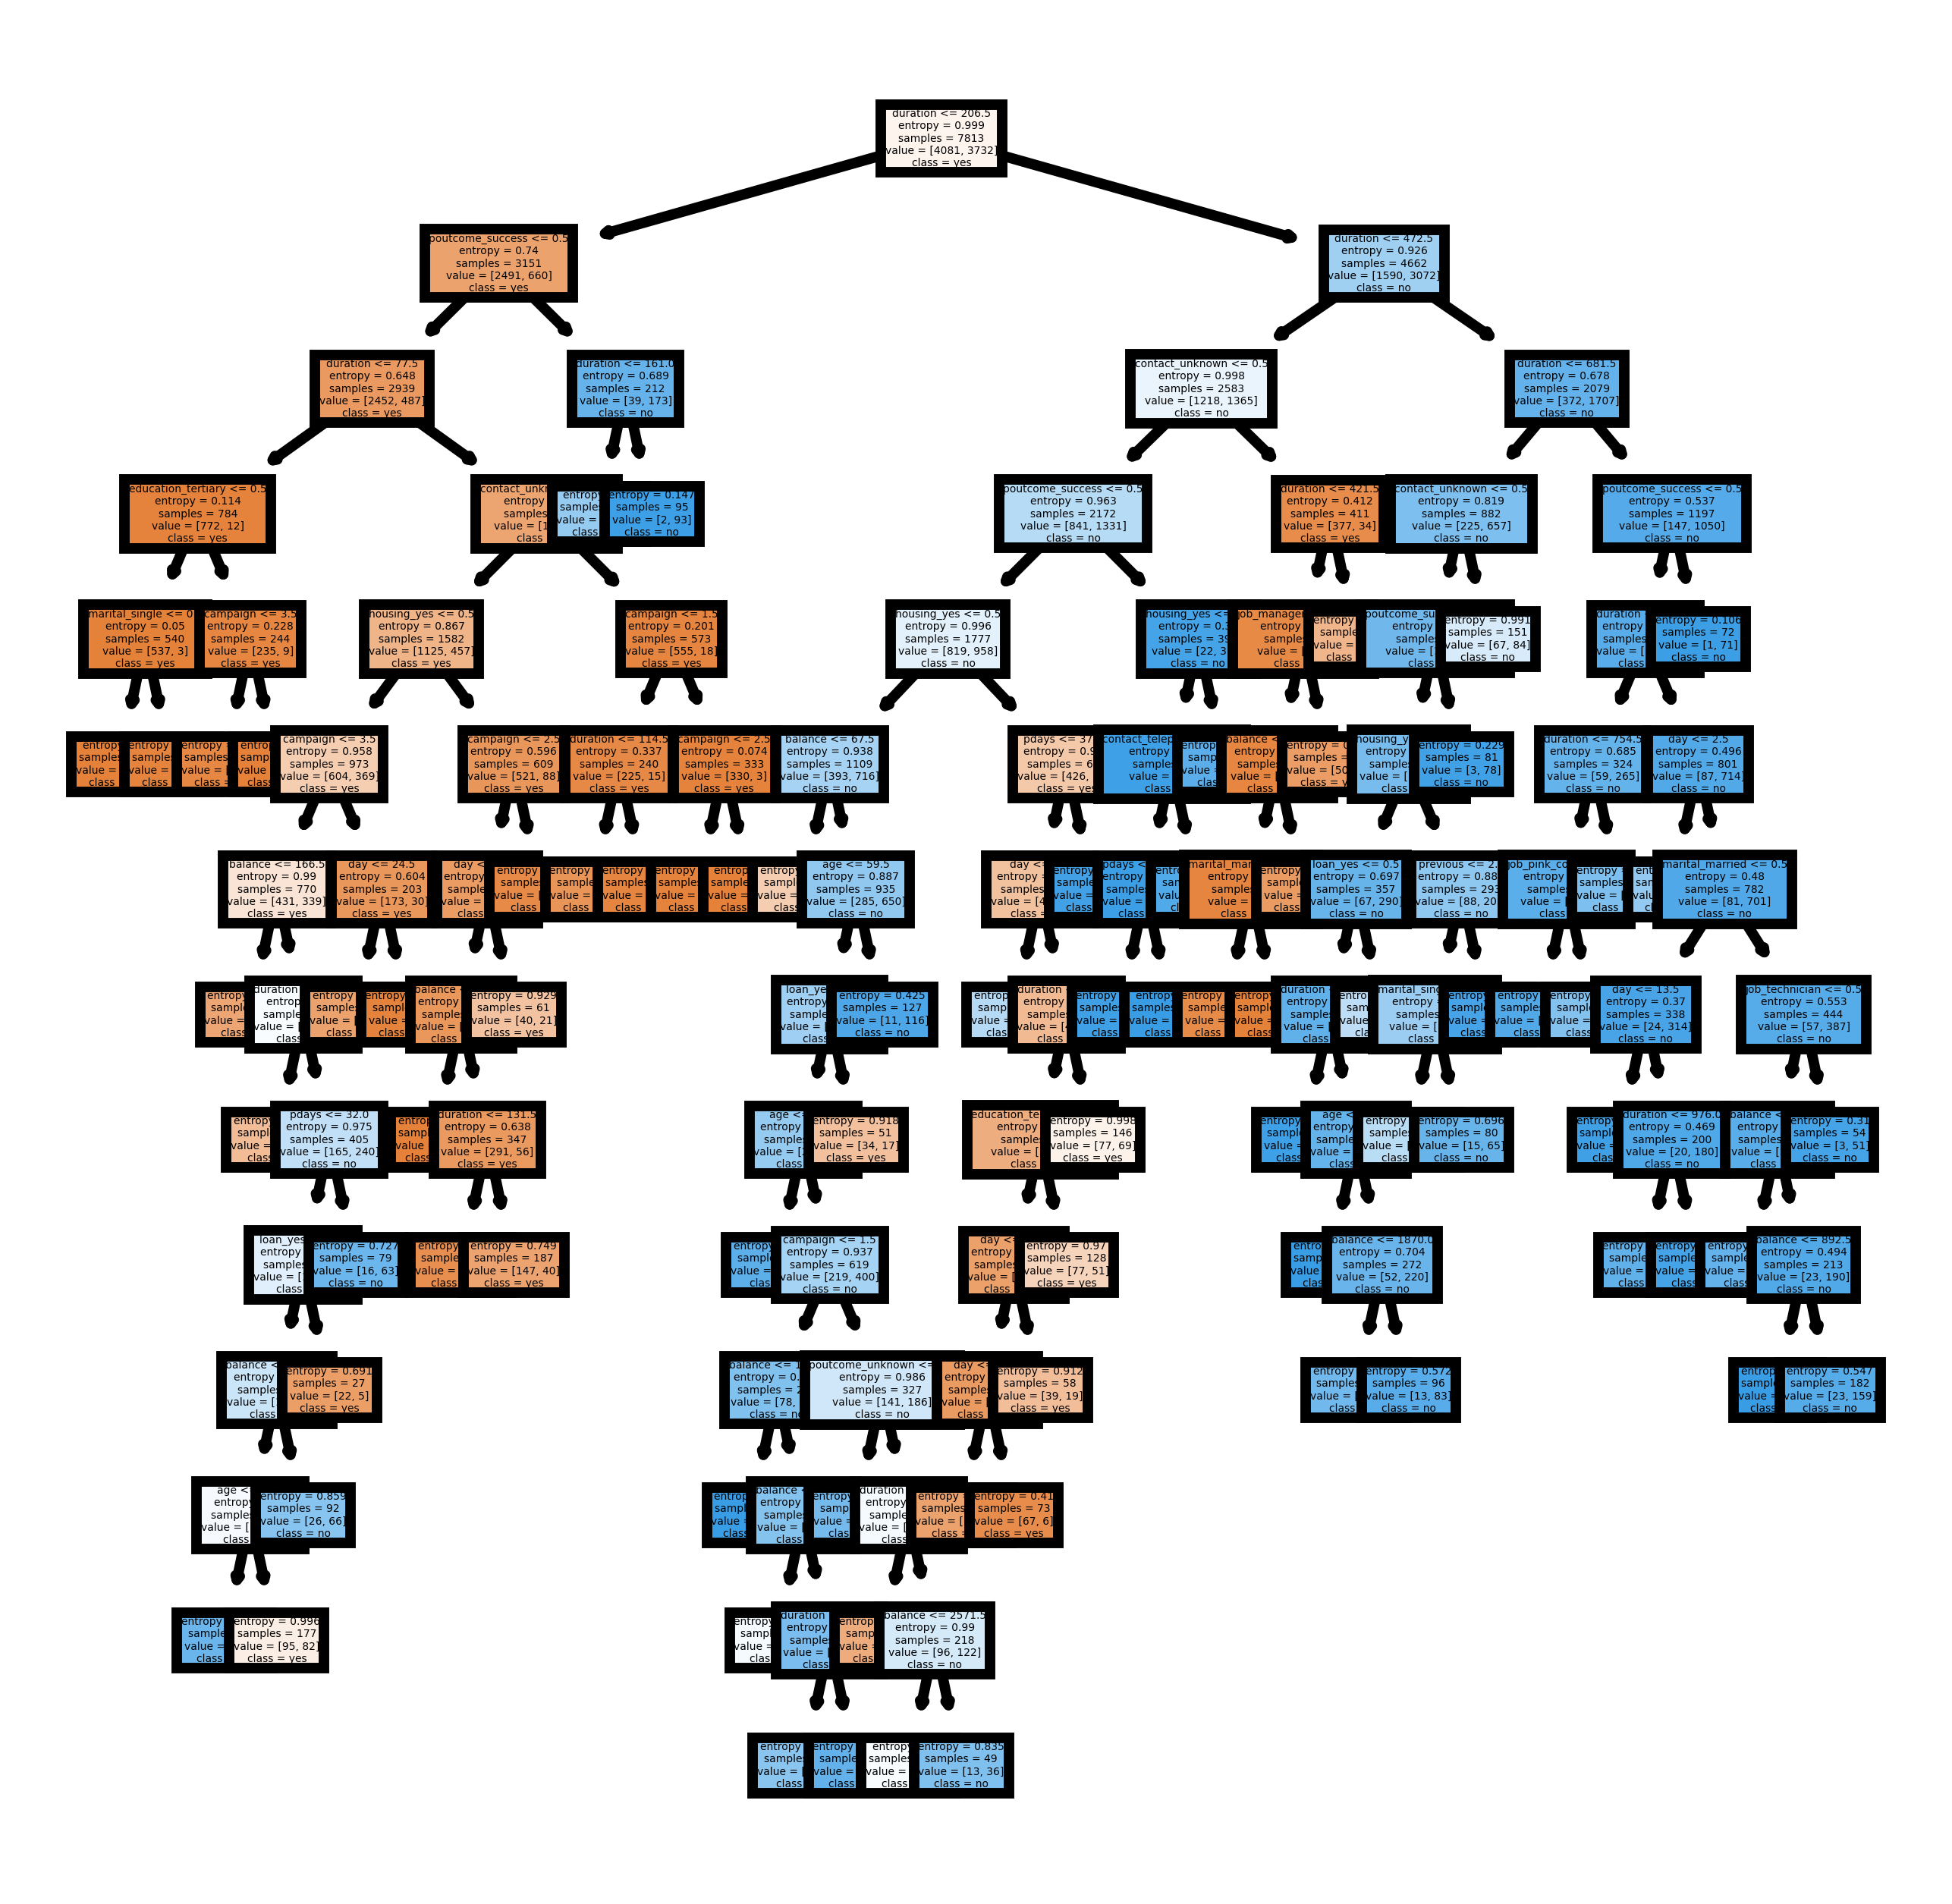

In [54]:
fn=x_train.columns
cn=["yes","no"]
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt3,feature_names = fn,class_names=cn,filled = True);

In [55]:
g=pd.DataFrame({"feature":x_train.columns, "imp":dt3.feature_importances_}).sort_values(by=["imp"], ascending=False)
g[g["imp"]>=.01].feature.values

array(['duration', 'poutcome_success', 'contact_unknown', 'housing_yes',
       'balance', 'campaign', 'age', 'day', 'pdays', 'loan_yes'],
      dtype=object)

In [56]:
# Feature importance
d=pd.DataFrame({"features":x_train.columns, "imp":dt3.feature_importances_}).sort_values(by=["imp"], ascending=False)
d[d["imp"]>=.01]["features"].values

array(['duration', 'poutcome_success', 'contact_unknown', 'housing_yes',
       'balance', 'campaign', 'age', 'day', 'pdays', 'loan_yes'],
      dtype=object)

In [57]:
selected_feat=['duration', 'poutcome_success', 'contact_unknown', 'housing_yes',
       'balance', 'campaign', 'age', 'day', 'pdays', 'loan_yes']

In [58]:
y=final_data["deposit"]
x=final_data[selected_feat]

In [59]:
x_train1,x_test1,y_train1, y_test1=train_test_split(x,y,test_size=.3, random_state=0)

In [60]:
dt4=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=200, random_state=0)

In [61]:
dt4.fit(x_train1, y_train1)
print("train Accuracy", dt4.score(x_train1, y_train1))
print("test Accuracy", dt4.score(x_test1, y_test1))

train Accuracy 0.8246512223217715
test Accuracy 0.8106897581367573


In [62]:
pred_train=dt4.predict(x_train1)
pred_test=dt4.predict(x_test1)


In [63]:
metrics.confusion_matrix(y_train1, pred_train)


array([[3354,  727],
       [ 643, 3089]])

In [64]:
metrics.confusion_matrix(y_test1, pred_test)

array([[1459,  333],
       [ 301, 1256]])

In [65]:
print(metrics.classification_report(y_train1, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4081
           1       0.81      0.83      0.82      3732

    accuracy                           0.82      7813
   macro avg       0.82      0.82      0.82      7813
weighted avg       0.82      0.82      0.82      7813



In [66]:
print(metrics.classification_report(y_test1, pred_test))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1792
           1       0.79      0.81      0.80      1557

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [67]:
metrics.roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

In [68]:
pred_prob=pd.DataFrame(dt4.predict_proba(x_train1), columns=["prob_0", "prob_1"])


In [69]:
# ROc curve
metrics
auc=metrics.roc_auc_score(y_train1, pred_prob["prob_1"])



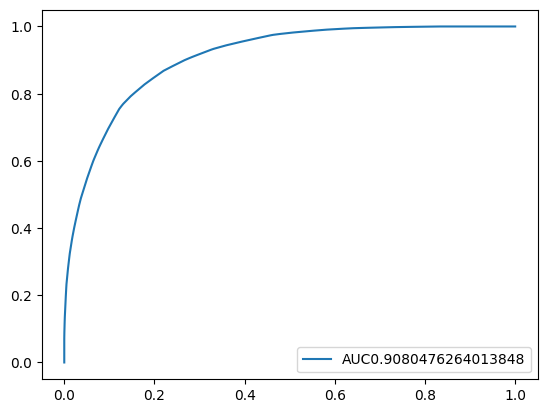

In [70]:
FPR, TPR, threshold=metrics.roc_curve(y_train1,pred_prob["prob_1"] )
auc=metrics.roc_auc_score(y_train1,pred_prob["prob_1"] )
plt.plot(FPR, TPR,label="AUC"+str(auc))
plt.legend()
plt.show()

In [71]:
x_train1.head(2)

,duration,poutcome_success,contact_unknown,housing_yes,balance,campaign,age,day,pdays,loan_yes
2265,94.0,False,False,False,1662.0,2,55,4,-1.0,False
1525,882.0,False,False,True,-522.0,3,39,17,-1.0,True


In [72]:
new=pd.DataFrame({"duration":[10],
                  "poutcome_success":[1],
                  "contact_unknown":[0],
                  "housing_yes":[1],
                  "balance":[500],
                  "campaign":[2],
                  "age":[70],
                  "day":[10],
                  "pdays":[200],
                  "loan_yes":[1]})
new

,duration,poutcome_success,contact_unknown,housing_yes,balance,campaign,age,day,pdays,loan_yes
0,10,1,0,1,500,2,70,10,200,1


In [73]:
if dt4.predict(new)[0]==1:
  print("Deposit")
else:
  print("No deposit")

Deposit


In [74]:
dt4.predict_proba(new)

array([[0.31623932, 0.68376068]])

confusion_matrix, 
acuracy, 
recall, 
precision, 
F1 Score

In [ ]:
# Other methods for feature selection

In [ ]:
# Information Gain

In [76]:
y=final_data["deposit"]
x=final_data.drop(columns=["deposit"])

In [77]:
from sklearn.feature_selection import mutual_info_classif

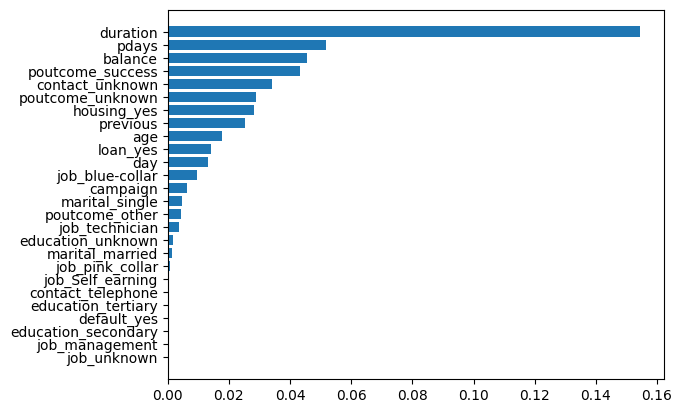

In [78]:
imp=mutual_info_classif(x,y)
m1=pd.DataFrame({"Features":x.columns, "imp":imp}).sort_values(by=["imp"], ascending=True)
plt.barh(y=m1["Features"], width=m1["imp"])
plt.show()

In [79]:
# Fisher Score
# Exhaustive Feature Selection

In [87]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Exhaustive feature selection with reduced range of features and parallelization
efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(), 
                                min_features=5,  # Increased min features to reduce combinations
                                max_features=8,  # Reduced max features to reduce execution time
                                scoring="roc_auc", 
                                cv=2,  # Keep the cross-validation folds low for faster execution
                                n_jobs=-1)  # Parallel processing for faster computation

In [ ]:
efs.fit(x,y) # Taking too long

In [ ]:
# Get the best feature set
x.columns[list(efs.best_idx_)]

In [ ]:
# Get the best score
efs.best_score_